## CS675 - Midterm Project

# Different Regression models to predict the housing prices

#### Team: 
* Jay Ashvinkumar Sorathiya
* Manish Bhikhabhai Patel
* Harshitha Sadashiv Murthy
* Pooja Kittanakere Balaji

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Importing Libraries 

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, preprocessing, model_selection, metrics
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [61]:
#Importing train and test datasets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
#Drop the column ID from train and test
train = train.drop(['Id'],axis = 1)
test = test.drop(['Id'],axis = 1)

## 1. Data quality checking, missing data imputation

In [62]:
train = train[train.columns[train.isnull().mean() < 0.70]] #dropping columns with more than 70% missing value
test = test[test.columns[test.isnull().mean() < 0.70]]

In [63]:
train_o = train.select_dtypes(include=['object']).copy()
test_o = test.select_dtypes(include=['object']).copy()

In [64]:
train.drop(train_o.columns.values, axis=1, inplace = True)
test.drop(test_o.columns.values, axis=1, inplace = True)

In [65]:
for cols in train.columns.values:
    train[cols] = train[cols].fillna(train[cols].mean())

for cols in test.columns.values:
    test[cols] = test[cols].fillna(test[cols].mean())

l = LabelEncoder()

for cols in train_o.columns[train_o.isnull().any()]:
    train_o[cols] = train_o[cols].fillna('NA')

for cols in train_o.columns.values:
    train_o[cols] = l.fit_transform(train_o[cols])
    
for cols in test_o.columns[test_o.isnull().any()]:
    test_o[cols] = test_o[cols].fillna('NA')

for cols in test_o.columns.values:
    test_o[cols] = l.fit_transform(test_o[cols])

In [66]:
print(test.isnull().values.sum())
print(test_o.isnull().values.sum())
print(train.isnull().values.sum())
print(train_o.isnull().values.sum())

0
0
0
0


## 2.  Feature selection. What's your rationals to choose those features.

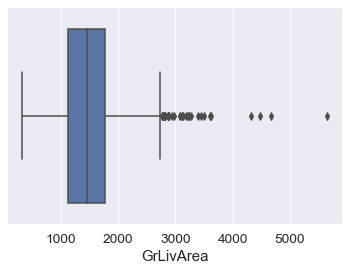

In [67]:
train = pd.concat([train,train_o], axis=1)
test = pd.concat([test,test_o], axis=1)
sns.boxplot(x=train['GrLivArea'])

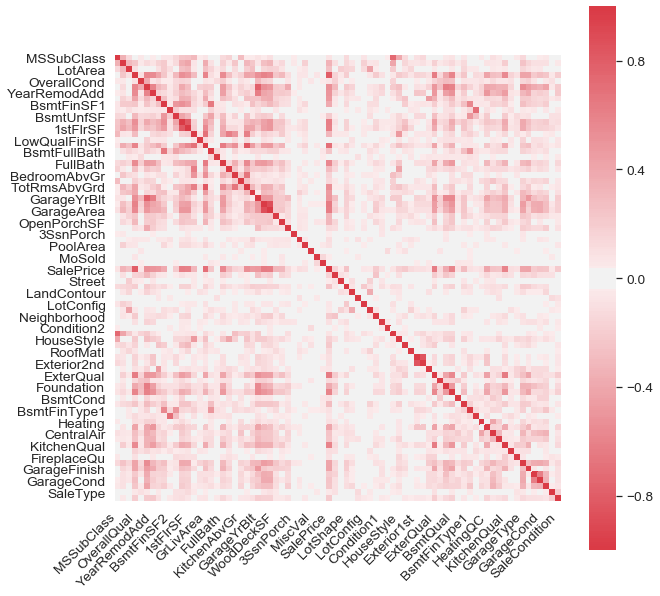

In [68]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [69]:
#Consider the columns with correlation greater than 0.3

corr[corr['SalePrice']>0.6].index

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [70]:
train = train[(np.abs(stats.zscore(train['GrLivArea'])) < 3)]
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,6,3,1,2,5,5,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,3,6,5,1,2,5,5,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,6,5,1,2,5,5,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2,6,2,5,3,5,5,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2,6,5,1,2,5,5,2,8,4


In [71]:
train_test = train.copy()
test_copy = test.copy()

In [72]:
#Checking the variance of each columns
DF = pd.DataFrame(train.var())
DF.head()

,0
MSSubClass,1.795023e+03
LotFrontage,4.291947e+02
LotArea,9.596367e+07
OverallQual,1.847893e+00
OverallCond,1.222213e+00


### Feature Selection: 

Find the correlation between  independent variables and response variable. Consider only those varaibles for which the correlation is greater than 0.3 between salesprice and other variables in the dataset

In [73]:
#Consider the columns with correlation greater than 0.3

corr[corr['SalePrice']>0.5].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [74]:
#Droping columns with correlation lesser than 0.5 for train dataset

train = train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]

In [75]:
#Droping columns with correlation lesser than 0.5 for test dataset

test = test [['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

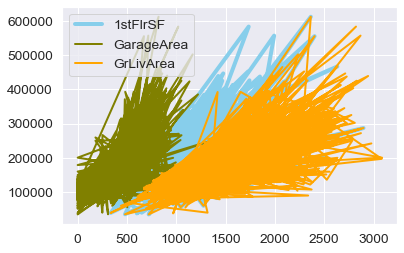

In [76]:
#Visualizing the linear relationship between the response variable and other columns

plt.plot( '1stFlrSF', 'SalePrice', data=train, marker='', color='skyblue', linewidth=4, label="1stFlrSF")
plt.plot( 'GarageArea', 'SalePrice', data=train, marker='', color='olive', linewidth=2, label="GarageArea")
plt.plot( 'GrLivArea', 'SalePrice', data=train, marker='', color='orange', linewidth=2, label="GrLivArea")
plt.legend()



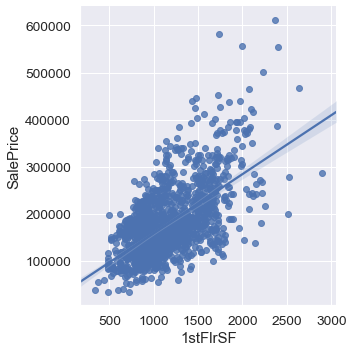

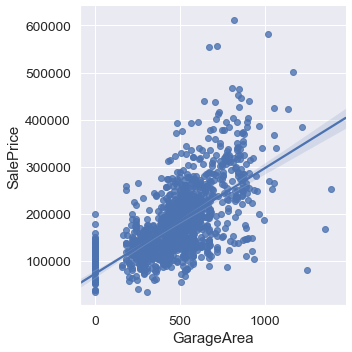

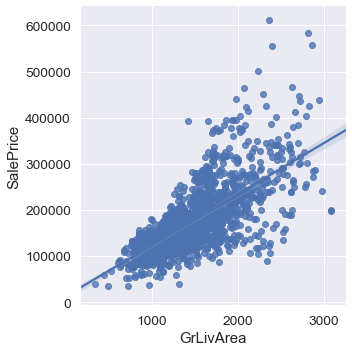

In [77]:
#Sales price and the below mentioned three features have a strong positive relation

sns.lmplot(x='1stFlrSF',y='SalePrice',data=train,)
sns.lmplot(x='GarageArea',y='SalePrice',data=train)
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

2    820
1    369
3    170
0     80
4      5
Name: GarageCars, dtype: int64


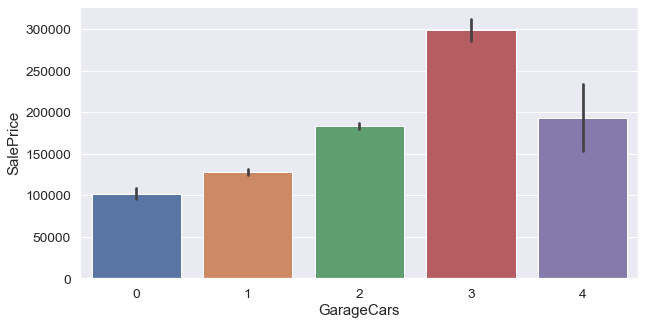

In [78]:
#Visualizing the number of fullbaths for different sales price 

print(train['GarageCars'].value_counts())

plt.figure(figsize=(10,5))
sns.barplot(x='GarageCars',y = 'SalePrice',data=train)
plt.show()

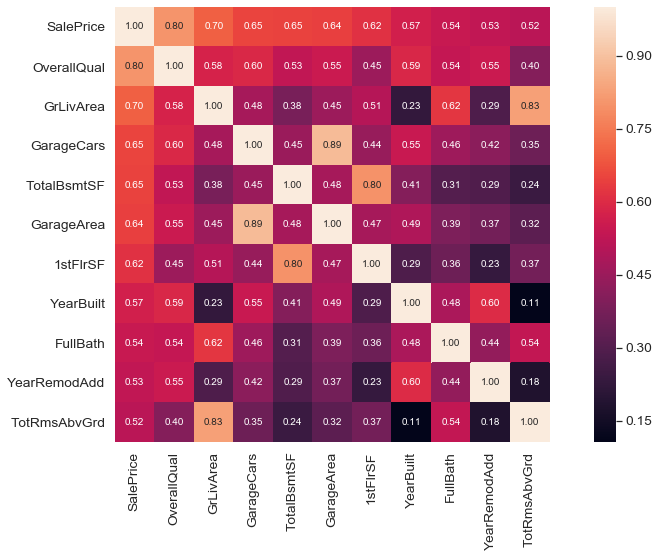

In [79]:
#saleprice correlation heatmap for the selected features
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 3. Create at least 5 new features and explain your reason for every new features.

## Creating new Features:

In the below code, 8 new features are been created:

▪︎ TotalBath = Total no of Baths in the house. It is the sum of all the full baths as 1 and half baths as 0.5 in a house.

▪︎ TotalSF : Total square feet area which is the sum of square feet areas of the basement, firstfloor and second floor

▪︎ Total_floors : The total number of floors in the house that is sum of first floors and second floors.

▪︎ Has_garage : If the "GarageArea" column is greater than 1 set the value of new col as 1 else 0.

▪︎ Has_bsmt : If the "TotalBsmtSF" column is greater than 1 set the value of new col as 1 else 0.

▪︎ has_fire_place : If the "Fireplaces" column is greater than 1 set the value of new col as 1 else 0.

▪︎ Total_porch_sf : Total porch square feet area which is the sum of square feet areas of the OpenPorchSF and WoodDeckSF.

▪︎ YearsSinceRemodel : This feature gives the number of years the house has been remodelled from the time it was first built.



In [134]:
train.head()

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,totalBath,TotalSF,total_floors,hasgarage,hasbsmt,hasfireplace,Total_porch_sf,YearsSinceRemodel
0,7,1710,2,8,3.5,2566,1710,1,1,0,61,0
1,6,1262,2,6,2.5,2524,1262,1,1,1,298,0
2,7,1786,2,6,3.5,2706,1786,1,1,1,42,1
3,7,1717,1,7,2.0,2473,1717,1,1,1,35,55
4,8,2198,2,9,3.5,3343,2198,1,1,1,276,0


In [81]:
corr[(corr['SalePrice']>0.25) & (corr['SalePrice']<0.55)].index

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', '2ndFlrSF', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'Foundation', 'CentralAir'],
      dtype='object')

In [82]:
# train_test.info()

In [83]:
# #For train dataset:
train['totalBath'] = train_test['BsmtFullBath'] + train_test['FullBath'] + train_test['BsmtHalfBath'].apply(lambda x: 0.5*x if x > 0 else 0) + train_test['HalfBath'].apply(lambda y: 0.5*y if y > 0 else 0)
train['TotalSF'] = train['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']
train['total_floors'] = train_test['2ndFlrSF'] + train['1stFlrSF']
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# train['GarageCars'] = train['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
train['hasfireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train['Total_porch_sf'] = (train_test['OpenPorchSF'] + train_test['WoodDeckSF'])
train['YearsSinceRemodel'] = train['YearRemodAdd'].astype(int) - train['YearBuilt'].astype(int)

train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,totalBath,TotalSF,total_floors,hasgarage,hasbsmt,hasfireplace,Total_porch_sf,YearsSinceRemodel
0,7,2003,2003,856,856,1710,2,8,2,548,208500,3.5,2566,1710,1,1,0,61,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,2.5,2524,1262,1,1,1,298,0
2,7,2001,2002,920,920,1786,2,6,2,608,223500,3.5,2706,1786,1,1,1,42,1
3,7,1915,1970,756,961,1717,1,7,3,642,140000,2.0,2473,1717,1,1,1,35,55
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,3.5,3343,2198,1,1,1,276,0


In [110]:
#Drop those columns which are already been used in the feature creation in train dataset

train = train.drop(['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GarageArea'], axis=1)

KeyError: "['YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF' 'GarageArea'] not found in axis"

In [85]:
#train = train[['totalBath','OverallQual','GrLivArea','FullBath','TotRmsAbvGrd','TotalSF','total_floors','hasgarage','hasbsmt','hasfireplace','SalePrice']]

In [86]:
ytrain = train[['SalePrice']]

In [89]:
train = train.drop(['SalePrice'], axis =1)

In [109]:
train.head()

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,totalBath,TotalSF,total_floors,hasgarage,hasbsmt,hasfireplace,Total_porch_sf,YearsSinceRemodel
0,7,1710,2,8,2,3.5,2566,1710,1,1,0,61,0
1,6,1262,2,6,2,2.5,2524,1262,1,1,1,298,0
2,7,1786,2,6,2,3.5,2706,1786,1,1,1,42,1
3,7,1717,1,7,3,2.0,2473,1717,1,1,1,35,55
4,8,2198,2,9,3,3.5,3343,2198,1,1,1,276,0


In [112]:
train = train.drop(['GarageCars'],axis =1)

In [106]:
#For test dataset

test['totalBath'] = test_copy['BsmtFullBath'] + test_copy['FullBath'] + test_copy['BsmtHalfBath'].apply(lambda x: 0.5*x if x > 0 else 0) + test_copy['HalfBath'].apply(lambda y: 0.5*y if y > 0 else 0)
test['TotalSF'] = test_copy['TotalBsmtSF'] + test_copy['1stFlrSF']
test['total_floors'] = test_copy['2ndFlrSF'] + test_copy['1stFlrSF']
test['hasgarage'] = test_copy['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasbsmt'] = test_copy['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
#test['GarageCars'] = test['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
test['hasfireplace'] = test_copy['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['Total_porch_sf'] = (test_copy['OpenPorchSF'] + test_copy['WoodDeckSF'])
test['YearsSinceRemodel'] = test_copy['YearRemodAdd'].astype(int) - test_copy['YearBuilt'].astype(int)

In [107]:
test.head()

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,TotalSF,total_floors,hasgarage,hasbsmt,hasfireplace,totalBath,Total_porch_sf,YearsSinceRemodel
0,5,896,1,5,1778.0,896,1,1,0,1.0,140,0
1,6,1329,1,6,2658.0,1329,1,1,0,1.5,429,0
2,5,1629,2,6,1856.0,1629,1,1,1,2.5,246,1
3,6,1604,2,7,1852.0,1604,1,1,1,2.5,396,0
4,8,1280,2,5,2560.0,1280,1,1,0,2.0,82,0


In [91]:
#Drop those columns which are already been used in the feature creation in test dataset

#test = test.drop(['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF', 
 #                   'GarageCars', 'GarageArea'], axis=1)



In [92]:
#test = test[['totalBath''OverallQual','GrLivArea','FullBath','TotRmsAbvGrd',
 #             'TotalSF','total_floors','hasgarage','hasbsmt','hasfireplace']]

## 4. Use feature importance to help you choose 10 features

## Feature importance: 

In the code below ExtraTreesClassifier classifier is used to estimate the importance of features 

In [93]:
array = train.values
X = array[:,0:9]
Y = array[:,9]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.10466094 0.09703925 0.05283489 0.08626895 0.0380573  0.02929217
 0.44160318 0.13044761 0.01979572]


In [94]:
## From train divide into 70% 30% train and test respectively
#X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], 
 #                                                   test_size=0.3, random_state=101)

### Scaling and Transformation

In [95]:
# Scaling and Transformation

# y_train= y_train.values.reshape(-1,1)
# y_test= y_test.values.reshape(-1,1)


# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)
# y_train = sc_X.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

## 5. Choose 3 ML algorithms we covered in the class to build your prediction models

1. Linear Regression Model
2. Support Vector Machine Regression
3. Decision Tree Regressor

### 1. Linear Regression Model :

In [136]:
#instantiate model
regressor = LinearRegression()

#fit the model to data
regressor.fit(train,ytrain)

print(regressor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [137]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

#predict on new data
predictions = regressor.predict(test)
predictions= predictions.reshape(-1,1)

[-61017.06518064]
[[ 2.33014620e+04 -1.43124545e+01 -1.26270761e+04 -3.11498529e+02
   1.58880489e+04  5.12091419e+01  6.91000039e+00  5.44420070e+03
  -4.76224161e+04  5.90717935e+03  3.29700562e+01 -2.74072076e+01]]


In [138]:
#read the test.csv file
t1 = pd.read_csv('test.csv')
test_id = t1['Id']
t1 = pd.DataFrame(test_id, columns=['Id'])

In [139]:
#initiate the model and predict on test data
test_prediction=regressor.predict(test)
test_prediction= test_prediction.reshape(-1,1)
print(test_prediction)

[[28339290.07852242]
 [42372221.24003546]
 [29557370.35846379]
 ...
 [38964072.03338437]
 [29996089.53435675]
 [31777238.34243428]]


In [141]:
#Predicting the salesprice 
#test_prediction =sc_y.inverse_transform(test_prediction)
test_prediction = pd.DataFrame(test_prediction, columns=['SalePrice'])

test_pred = pd.concat([test_id,test_prediction], axis=1)
test_pred.head()
test_pred.to_csv("predictions_linear.csv", index = None)

### Trying to improve the model by running Logistic Regression

In [113]:
#instantiate model
regressor = LogisticRegression()

#fit the model to data
regressor.fit(train,ytrain)

print(regressor)

C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [173]:
#To retrieve the intercept:
#print(regressor.intercept_)
#For retrieving the slope:
#print(regressor.coef_)

#predict on new data
predictions = regressor.predict(test)
predictions= predictions.reshape(-1,1)

### Running the trained model on test dataset to predict the saleprice

In [98]:
#read the test.csv file
t1 = pd.read_csv('test.csv')
test_id = t1['Id']
t1 = pd.DataFrame(test_id, columns=['Id'])

In [99]:
#Scale and transform
# test = sc_X.fit_transform(test)
# test.shape

In [133]:
#initiate the model and predict on test data
test_prediction=regressor.predict(test)
test_prediction= test_prediction.reshape(-1,1)
print(test_prediction)

[[206300]
 [206300]
 [206300]
 ...
 [206300]
 [206300]
 [206300]]


In [142]:
regressor2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=12, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#fit the model to data
regressor2.fit(train,ytrain)

print(regressor2)

C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=12, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [143]:
#Predicting the salesprice 
#test_prediction =sc_y.inverse_transform(test_prediction)
test_prediction = pd.DataFrame(test_prediction, columns=['SalePrice'])

test_pred = pd.concat([test_id,test_prediction], axis=1)
test_pred.head()

,Id,SalePrice
0,1461,2.833929e+07
1,1462,4.237222e+07
2,1463,2.955737e+07
3,1464,2.952086e+07
4,1465,4.083918e+07


In [144]:
test_pred.to_csv("predictions_logistic.csv", index = None)

### 2. Support Vector Machine Regression

In [145]:
##instantiate model
svmr = SVR(kernel='linear')

In [146]:
#fit the model
svmr.fit(train, ytrain)

C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
#predict on new data
svmr_pred = svmr.predict(test)
#svmr_pred= svmr_pred.reshape(-1,1)

In [148]:
#read the test.csv file
t2 = pd.read_csv('test.csv')
test_id1 = t2['Id']
t2 = pd.DataFrame(test_id1, columns=['Id'])

#Predicting the salesprice 
#tree_prediction =sc_y.inverse_transform(tree_prediction)
tree_pred = pd.DataFrame(tree_pred, columns=['SalePrice'])

tree_pred = pd.concat([test_id1,tree_pred], axis=1)
tree_pred.head()

,Id,SalePrice
0,1461,100000.0
1,1462,100000.0
2,1463,110000.0
3,1464,148000.0
4,1465,100000.0


In [149]:
test_pred.to_csv("predictions_svm22.csv", index = None)

In [151]:
##instantiate model
svmr2 = SVR(C=1.0, cache_size=400, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
#fit the model
svmr2.fit(train, ytrain)

C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jayso\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=400, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [154]:
#predict on new data
svmr_pred = svmr2.predict(test)
svmr_pred= svmr_pred.reshape(-1,1)

In [155]:
#read the test.csv file
t2 = pd.read_csv('test.csv')
test_id1 = t2['Id']
t2 = pd.DataFrame(test_id1, columns=['Id'])

#Predicting the salesprice 
#tree_prediction =sc_y.inverse_transform(tree_prediction)
tree_pred = pd.DataFrame(tree_pred, columns=['SalePrice'])

tree_pred = pd.concat([test_id1,tree_pred], axis=1)
tree_pred.head()
test_pred.to_csv("predictions_svm2.csv", index = None)

### 3. Decision Tree Regressor

In [162]:
from sklearn.tree import DecisionTreeRegressor

In [163]:
dec = DecisionTreeRegressor()

In [164]:
#instantiate model
#dec = DecisionTreeRegressor(random_state = 100)
#fit the model
dec.fit(train, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [165]:
#Predict on new data
tree_pred = dec.predict(test)
tree_pred= tree_pred.reshape(-1,1)

In [166]:
#read the test.csv file
t2 = pd.read_csv('test.csv')
test_id1 = t2['Id']
t2 = pd.DataFrame(test_id1, columns=['Id'])

#Predicting the salesprice 
#tree_prediction =sc_y.inverse_transform(tree_prediction)
tree_pred = pd.DataFrame(tree_pred, columns=['SalePrice'])

tree_pred = pd.concat([test_id1,tree_pred], axis=1)
tree_pred.head()

,Id,SalePrice
0,1461,100000.0
1,1462,100000.0
2,1463,125000.0
3,1464,125000.0
4,1465,100000.0


In [167]:
test_pred.to_csv("predictions_decisionTree2.csv", index = None)

In [168]:
dec2 = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [169]:
#fit the model
dec2.fit(train, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [170]:
#Predict on new data
tree_pred = dec2.predict(test)
tree_pred= tree_pred.reshape(-1,1)

In [171]:
#read the test.csv file
t2 = pd.read_csv('test.csv')
test_id1 = t2['Id']
t2 = pd.DataFrame(test_id1, columns=['Id'])

#Predicting the salesprice 
#tree_prediction =sc_y.inverse_transform(tree_prediction)
tree_pred = pd.DataFrame(tree_pred, columns=['SalePrice'])

tree_pred = pd.concat([test_id1,tree_pred], axis=1)
tree_pred.head()

,Id,SalePrice
0,1461,92166.666667
1,1462,92166.666667
2,1463,124166.666667
3,1464,129333.333333
4,1465,92166.666667


In [172]:
test_pred.to_csv("predictions_decisionTree_params.csv", index = None)

## 6. For each model you build, you will need to evaluate and show your effort to improve it.

* We tried to improve the accuracy of every model we trained, by changing the parameters manually from the default. Below is our effort on how we took our accuracy near to 0.18564  Root-Mean-Squared-Error (RMSE) from 11.28

![Submissions on Kaggle](Submissions.png)